___

<a href='http://www.pieriandata.com'><img src='https://github.com/kunal266/Algo_Practice/blob/main/time_series_analysis/UDEMY_TSA_FINAL/Pierian_Data_Logo.png?raw=1'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
# IMPORTS HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [3]:
# CODE HERE
df = pd.read_csv('/content/drive/MyDrive/UDEMY_TSA_FINAL/Data/Miles_Traveled.csv',index_col='DATE',parse_dates = True)

In [4]:
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [5]:
# CODE HERE
df.columns = ['Value']

In [6]:
df.head()

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**TASK: Plot out the time series**

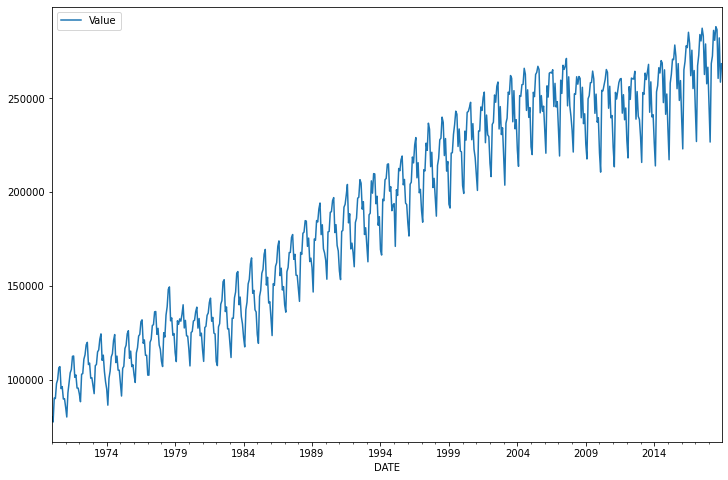

In [10]:
# CODE HERE
df.plot(figsize=(12,8))

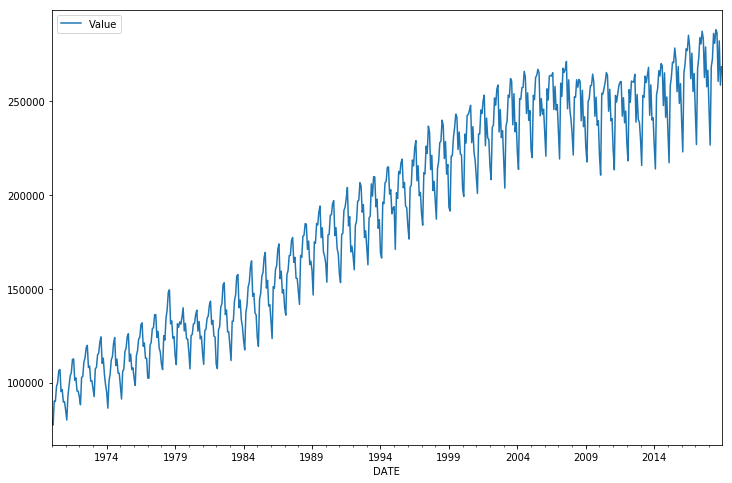

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

In [11]:
# CODE HERE
from statsmodels.tsa.seasonal import seasonal_decompose


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


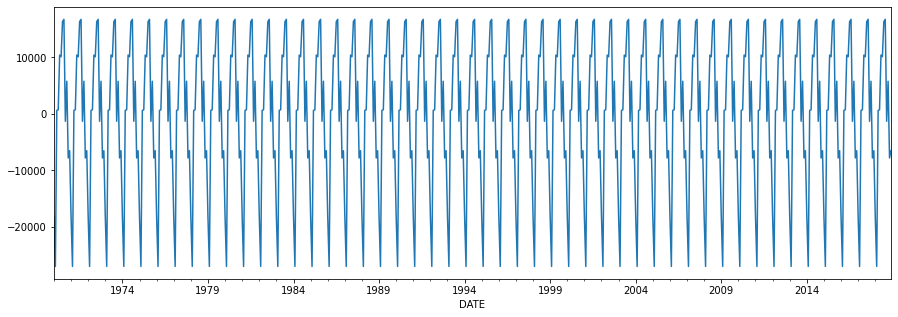

In [15]:
results = seasonal_decompose(df['Value'])
results.seasonal.plot(figsize=(15,5))

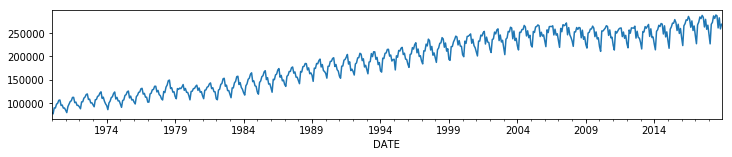

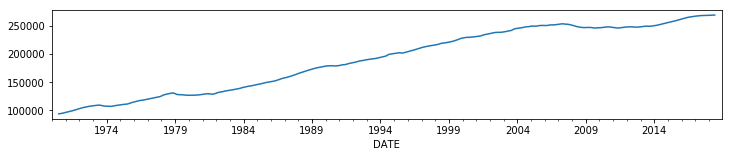

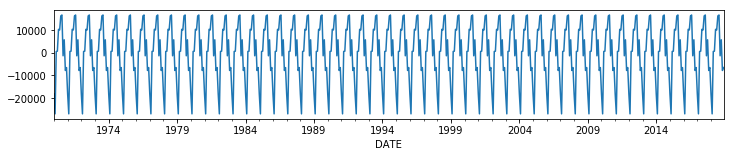

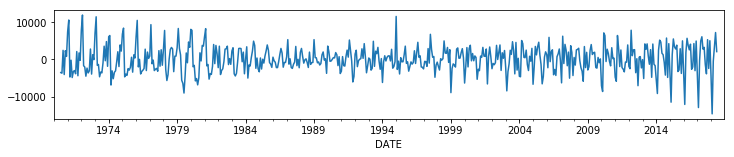

## Train Test Split

**TASK: Figure out the length of the data set**

In [16]:
# CODE HERE
len(df)

588

588

In [17]:
train = df.iloc[:-12]
test  = df.iloc[-12:]

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [ ]:
# CODE HERE


In [18]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [19]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler


In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(train)

MinMaxScaler()

'Value'

In [22]:
scaled_train = scaler.transform(train)


In [23]:
scaled_train

array([[0.0130109 ],
       [0.        ],
       [0.06089061],
       [0.05961858],
       [0.09780801],
       [0.10763646],
       [0.13792216],
       [0.14067108],
       [0.08485905],
       [0.08992334],
       [0.05832273],
       [0.0594042 ],
       [0.03760821],
       [0.01274887],
       [0.07399679],
       [0.09844641],
       [0.12488268],
       [0.13335334],
       [0.16685961],
       [0.16769811],
       [0.11361547],
       [0.11949919],
       [0.08629306],
       [0.0861025 ],
       [0.07157184],
       [0.05159575],
       [0.12140962],
       [0.12289603],
       [0.15961334],
       [0.17066617],
       [0.19605433],
       [0.20233825],
       [0.14592594],
       [0.14958957],
       [0.11123816],
       [0.11242443],
       [0.09157651],
       [0.07205778],
       [0.1431532 ],
       [0.14615462],
       [0.17806966],
       [0.18302438],
       [0.21078032],
       [0.22383886],
       [0.15669292],
       [0.16982768],
       [0.12834146],
       [0.102

In [26]:
scaled_test = scaler.transform(test)


In [27]:
scaled_test

array([[0.80158265],
       [0.71089704],
       [0.91013382],
       [0.92916661],
       [0.99438307],
       [0.969195  ],
       [1.00382085],
       [0.99649835],
       [0.8725685 ],
       [0.9753741 ],
       [0.86301637],
       [0.90981463]])

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [28]:
#CODE HERE
from keras.preprocessing.sequence import TimeseriesGenerator


In [29]:
n_input= 12
n_features = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [30]:
train_generator

In [31]:
X,y=  train_generator[0]


In [32]:
X

array([[[0.0130109 ],
        [0.        ],
        [0.06089061],
        [0.05961858],
        [0.09780801],
        [0.10763646],
        [0.13792216],
        [0.14067108],
        [0.08485905],
        [0.08992334],
        [0.05832273],
        [0.0594042 ]]])

In [33]:
y

array([[0.03760821]])

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [74]:
model = Sequential()
model.add(LSTM(160,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 160)               103680    
                                                                 
 dense_2 (Dense)             (None, 1)                 161       
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [75]:
# CODE HERE
model.fit(train_generator,epochs=25)

Epoch 1/25
564/564 [==============================] - 6s 9ms/step - loss: 0.0130
Epoch 2/25
564/564 [==============================] - 5s 9ms/step - loss: 0.0060
Epoch 3/25
564/564 [==============================] - 5s 9ms/step - loss: 0.0048
Epoch 4/25
564/564 [==============================] - 5s 9ms/step - loss: 0.0033
Epoch 5/25
564/564 [==============================] - 5s 9ms/step - loss: 0.0025
Epoch 6/25
564/564 [==============================] - 5s 9ms/step - loss: 0.0014
Epoch 7/25
564/564 [==============================] - 5s 9ms/step - loss: 0.0012
Epoch 8/25
564/564 [==============================] - 5s 9ms/step - loss: 9.8921e-04
Epoch 9/25
564/564 [==============================] - 5s 9ms/step - loss: 8.7609e-04
Epoch 10/25
564/564 [==============================] - 5s 9ms/step - loss: 8.9428e-04
Epoch 11/25
564/564 [==============================] - 5s 9ms/step - loss: 7.9576e-04
Epoch 12/25
564/564 [==============================] - 5s 9ms/step - loss: 7.7273e-04
Epoch

Epoch 1/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 2/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0011
Epoch 3/10
552/552 [==============================] - 16s 30ms/step - loss: 9.5115e-04
Epoch 4/10
552/552 [==============================] - 17s 30ms/step - loss: 8.8495e-04
Epoch 5/10
552/552 [==============================] - 17s 30ms/step - loss: 8.4229e-04
Epoch 6/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0012
Epoch 7/10
552/552 [==============================] - 17s 30ms/step - loss: 8.6496e-04
Epoch 8/10
552/552 [==============================] - 17s 30ms/step - loss: 7.5506e-04
Epoch 9/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 10/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0010


**TASK: Plot the history of the loss that occured during training.**

In [76]:
# CODE HERE
model.history.history['loss']

[0.012993287295103073,
 0.005985698662698269,
 0.004800187423825264,
 0.0033272095024585724,
 0.0024626837112009525,
 0.0014430901501327753,
 0.0011677310103550553,
 0.0009892084635794163,
 0.0008760886266827583,
 0.000894280499778688,
 0.0007957612397149205,
 0.0007727257907390594,
 0.000715316622518003,
 0.0006281191017478704,
 0.0006914371042512357,
 0.0005889826570637524,
 0.0006352646742016077,
 0.0006391027709469199,
 0.0006315721548162401,
 0.0006171464337967336,
 0.0006081336177885532,
 0.0005470308824442327,
 0.0006116559379734099,
 0.0005464885616675019,
 0.0005676497821696103]

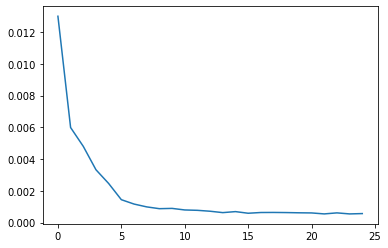

In [77]:
plt.plot(range(len(model.history.history['loss'])),model.history.history['loss'])

dict_keys(['loss'])

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [78]:
# CODE HERE
first_eval_batch = scaled_train[-n_input:]
first_eval_batch

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [79]:
current_batch = first_eval_batch.reshape(1,n_input,n_features)

In [80]:
current_batch.shape

(1, 12, 1)

**TASK: Generate predictions into the same time stamps as the test set**

In [81]:
# CODE HERE
test_prediction = []
for i in range(12):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [82]:
test_prediction

[array([0.8058737], dtype=float32),
 array([0.7334083], dtype=float32),
 array([0.89790833], dtype=float32),
 array([0.9331682], dtype=float32),
 array([0.98290485], dtype=float32),
 array([0.9721708], dtype=float32),
 array([0.9988556], dtype=float32),
 array([0.9799058], dtype=float32),
 array([0.8956696], dtype=float32),
 array([0.9540999], dtype=float32),
 array([0.8683596], dtype=float32),
 array([0.89945847], dtype=float32)]

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [83]:
#CODE HERE
predictions = scaler.inverse_transform(test_prediction)

In [84]:
predictions

array([[246595.69383198],
       [231385.12975699],
       [265913.85636771],
       [273314.93264651],
       [283754.7112214 ],
       [281501.62934017],
       [287102.78736877],
       [283125.20399469],
       [265443.94040787],
       [277708.52176023],
       [259711.55371839],
       [266239.23188335]])

array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [85]:
# CODE HERE
test['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
test

,Value,Predictions
DATE,,
2018-01-01,245695.0,246595.693832
2018-02-01,226660.0,231385.129757
2018-03-01,268480.0,265913.856368
2018-04-01,272475.0,273314.932647
2018-05-01,286164.0,283754.711221
2018-06-01,280877.0,281501.629340
2018-07-01,288145.0,287102.787369
2018-08-01,286608.0,283125.203995
2018-09-01,260595.0,265443.940408


,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


**TASK: Plot out the test set against your own predicted values.**

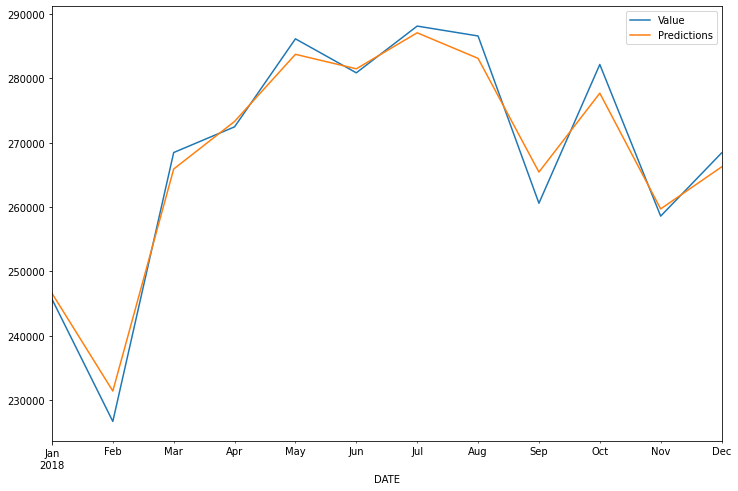

In [87]:
# CODE HERE
test.plot(figsize=(12,8))

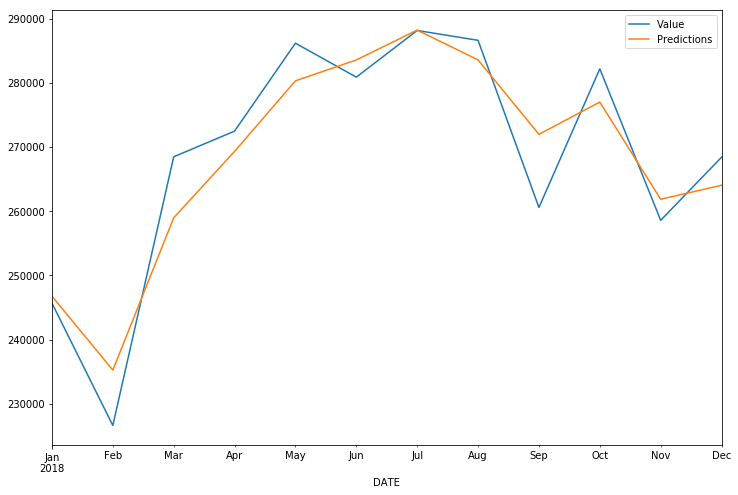

# Saving Models

**TASK: Optional, Save your model!**

In [88]:
model.save('boothang.h5')